# IRIS Retail Data Analysis

This notebook performs Exploratory Data Analysis (EDA) on the retail sales dataset to generate insights for the IRIS chatbot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

We will load all CSV files from the `Sales Dataset` directory.

In [2]:
# Define data path
DATA_PATH = 'Sales Dataset' 

csv_files = glob.glob(os.path.join(DATA_PATH, "*.csv"))

if not csv_files:
    print(f"No CSV files found in {DATA_PATH}. Please check the path.")
else:
    print(f"Found {len(csv_files)} CSV files:")
    for f in csv_files:
        print(f)

Found 7 CSV files:
Sales Dataset\Amazon Sale Report.csv
Sales Dataset\Cloud Warehouse Compersion Chart.csv
Sales Dataset\Expense IIGF.csv
Sales Dataset\International sale Report.csv
Sales Dataset\May-2022.csv
Sales Dataset\P  L March 2021.csv
Sales Dataset\Sale Report.csv


In [3]:
dataframes = {}
for file in csv_files:
    filename = os.path.basename(file)
    try:
        df = pd.read_csv(file, encoding='ISO-8859-1') # Try common encoding for retail data
        dataframes[filename] = df
        print(f"Loaded {filename} with shape {df.shape}")
    except Exception as e:
        print(f"Error loading {filename}: {e}")

Loaded Amazon Sale Report.csv with shape (128975, 24)
Loaded Cloud Warehouse Compersion Chart.csv with shape (50, 4)
Loaded Expense IIGF.csv with shape (17, 5)
Loaded International sale Report.csv with shape (37432, 10)
Loaded May-2022.csv with shape (1330, 17)
Loaded P  L March 2021.csv with shape (1330, 18)
Loaded Sale Report.csv with shape (9271, 7)


C:\Users\ashis\AppData\Local\Temp\ipykernel_20028\3541492815.py:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='ISO-8859-1') # Try common encoding for retail data


## 2. Data Cleaning & Preprocessing (Amazon Sale Report)

We will focus on `Amazon Sale Report.csv` for the primary analysis as it contains detailed transaction data.

In [4]:
df_amazon = dataframes.get('Amazon Sale Report.csv')

if df_amazon is not None:
    # Convert Date to datetime
    df_amazon['Date'] = pd.to_datetime(df_amazon['Date'], errors='coerce')
    
    # Drop rows with missing Amount for sales analysis
    df_amazon_clean = df_amazon.dropna(subset=['Amount'])
    
    print(f"Original shape: {df_amazon.shape}, Cleaned shape: {df_amazon_clean.shape}")
    print(f"Date range: {df_amazon_clean['Date'].min()} to {df_amazon_clean['Date'].max()}")
else:
    print("Amazon Sale Report.csv not found.")

C:\Users\ashis\AppData\Local\Temp\ipykernel_20028\3838697776.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_amazon['Date'] = pd.to_datetime(df_amazon['Date'], errors='coerce')


Original shape: (128975, 24), Cleaned shape: (121180, 24)
Date range: 2022-03-31 00:00:00 to 2022-06-29 00:00:00


## 3. Exploratory Data Analysis (EDA)

### 3.1 Sales Overview

Total Sales: INR 78,592,678.30
Total Orders: 113030
Average Order Value: INR 695.33


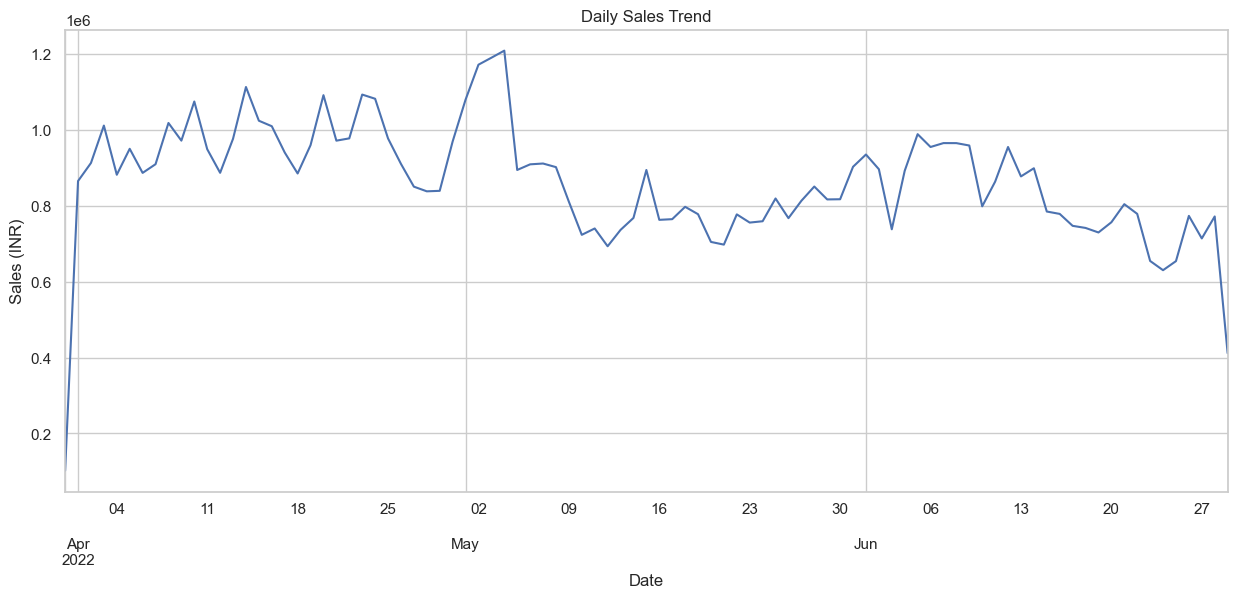

In [5]:
if df_amazon is not None:
    total_sales = df_amazon_clean['Amount'].sum()
    total_orders = df_amazon_clean['Order ID'].nunique()
    avg_order_value = total_sales / total_orders

    print(f"Total Sales: INR {total_sales:,.2f}")
    print(f"Total Orders: {total_orders}")
    print(f"Average Order Value: INR {avg_order_value:,.2f}")

    # Sales over time
    daily_sales = df_amazon_clean.groupby('Date')['Amount'].sum()
    plt.figure(figsize=(15, 6))
    daily_sales.plot()
    plt.title('Daily Sales Trend')
    plt.ylabel('Sales (INR)')
    plt.xlabel('Date')
    plt.show()

### 3.2 Category Analysis

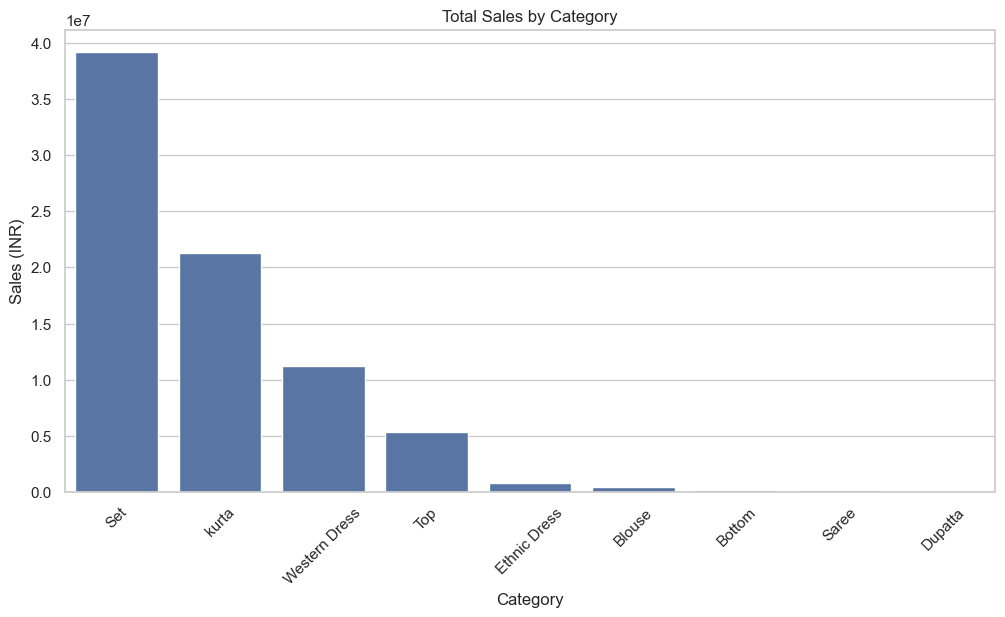

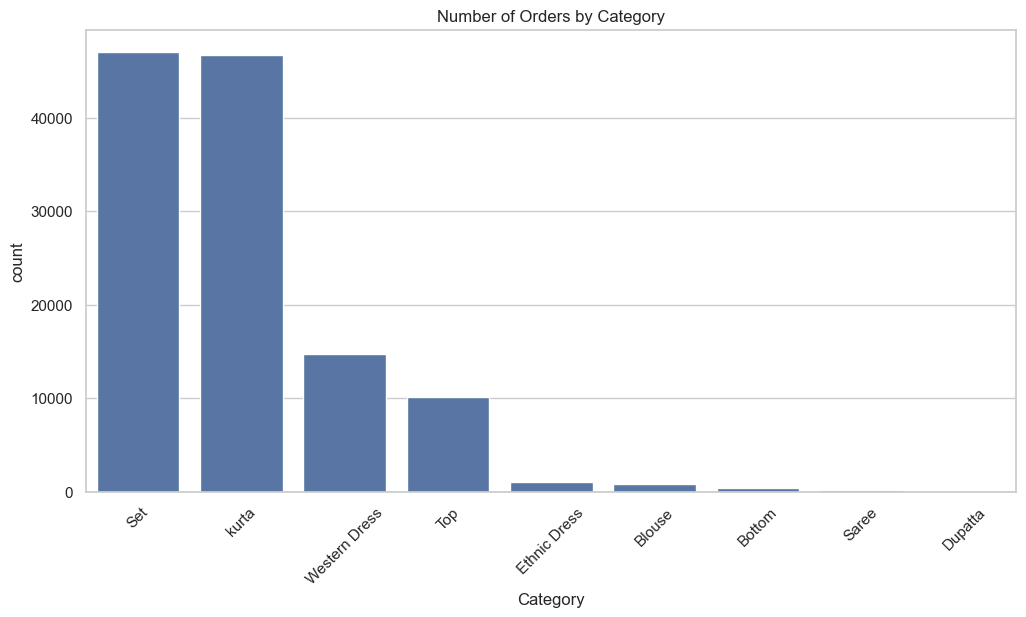

In [6]:
if df_amazon is not None:
    # Sales by Category
    category_sales = df_amazon_clean.groupby('Category')['Amount'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=category_sales.index, y=category_sales.values)
    plt.title('Total Sales by Category')
    plt.xticks(rotation=45)
    plt.ylabel('Sales (INR)')
    plt.show()
    
    # Count of items by Category
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_amazon_clean, x='Category', order=df_amazon_clean['Category'].value_counts().index)
    plt.title('Number of Orders by Category')
    plt.xticks(rotation=45)
    plt.show()

### 3.3 Geographic Analysis

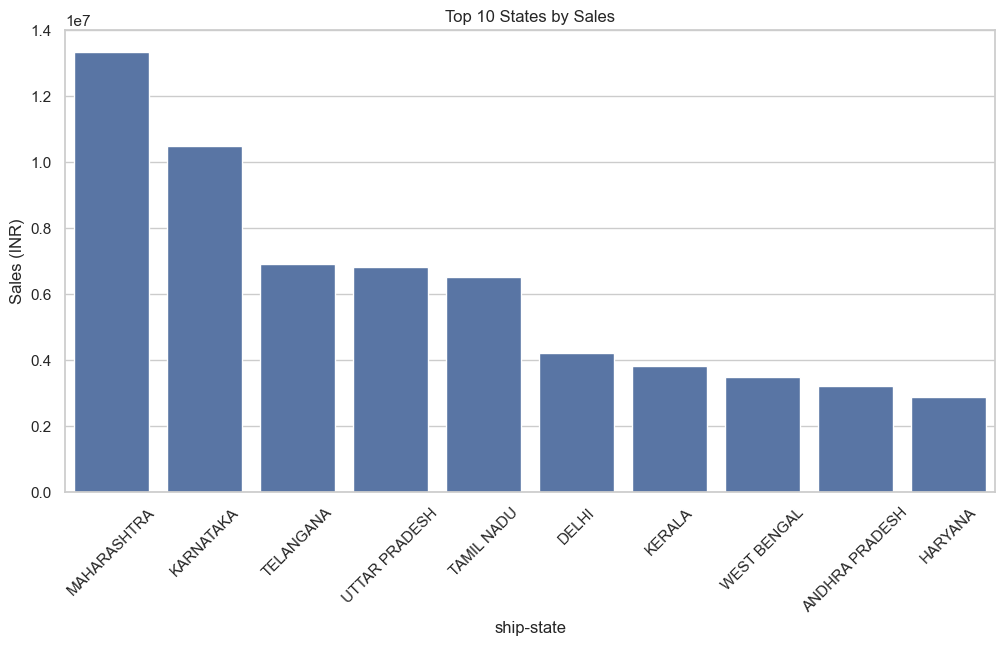

In [7]:
if df_amazon is not None:
    # Top 10 States by Sales
    state_sales = df_amazon_clean.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=state_sales.index, y=state_sales.values)
    plt.title('Top 10 States by Sales')
    plt.xticks(rotation=45)
    plt.ylabel('Sales (INR)')
    plt.show()

### 3.4 Status Analysis

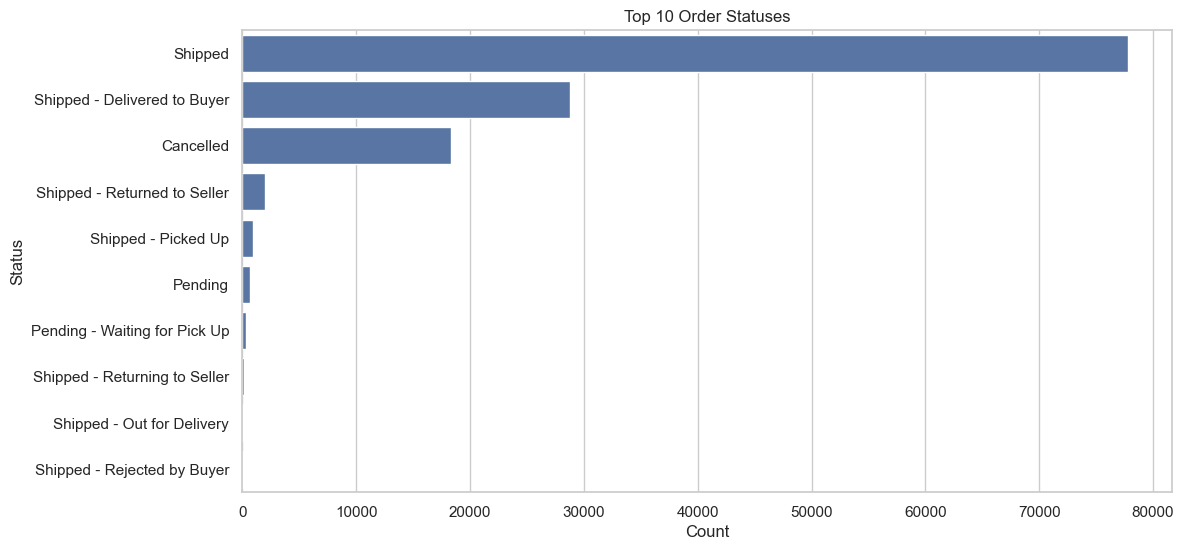

In [8]:
if df_amazon is not None:
    status_counts = df_amazon['Status'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(y=status_counts.index, x=status_counts.values, orient='h')
    plt.title('Top 10 Order Statuses')
    plt.xlabel('Count')
    plt.show()